# Fondo de luz


**Autor**: Luis Miguel Sánchez Brea.

**Fecha**: 29/06/2019.

**Objetivo**: calibración

**Descripción**: Enviamos una imagen de nivel constante, vemos lo que sale en intensidad



## Parámetros

### Cargar librerías

In [1]:
%run config_jupyter.ipynb

In [2]:
import time
from pprint import pprint
import cv2
import screeninfo
import matplotlib.image as mpimg


In [3]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [4]:
from py_slm.smc100 import SMC100
import py_slm.camera.tisgrabber as IC
from py_slm.py_slm import SLM
from py_slm.config import CONF_HOLOEYE2500, CONF_PACKARD_BELL, CONF_IMAGING_SOURCE
from py_slm.config import wavelength, z_ini

In [5]:
s=1.

### Cargar motor

In [6]:
smc100 = SMC100(1, 'COM3', silent=True)

Connecting to SMC100 on COM3


In [7]:
smc100.set_velocity(20*mm/s, check=True)


(20.0, 20.0)


In [8]:
smc100.home()

In [28]:
smc100.move_absolute(112.7*mm)
smc100.get_position(verbose=True)

distance = 112.7000 mm


112700

### Cargar modulador

In [10]:
import screeninfo
screeninfo.get_monitors()

[monitor(1440x900+0+0), monitor(1024x768+1440+0)]

In [11]:
slm=SLM(config_SLM=CONF_HOLOEYE2500, config_Camera=CONF_IMAGING_SOURCE)

x0=slm.x0
y0=slm.y0
wavelength=slm.wavelength
print(x0.shape, y0.shape)

((1024L,), (768L,))


## Definir y fondo

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0xdd137b8>)

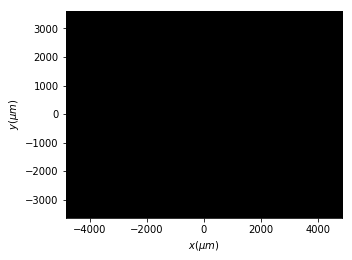

In [12]:
t_fondo=Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)
t_fondo.u=0.*np.ones_like(t_fondo.u)
t_fondo.draw(kind='intensity')

In [13]:
def get_fondo(level=0):
    t_fondo.one_level(level=level)

    "Creamos la imagen a partir de la máscara creada."
    slm.mask_to_rawImage(mask_XY=t_fondo, kind='intensity', normalize=True);
    "Enviamos la imagen al SLM."
    slm.send_image_screen()
    cv2.waitKey(500)
    slm.camera1.SnapImage()
    cv2.waitKey(500)
    image_fondo = slm.camera1.GetImage()
    cv2.waitKey(500)
    intensidad=(image_fondo[:,:,0])
    intensidad.shape
    intensidad = intensidad.astype('float') 
    
    return intensidad
    

In [14]:
image_fondo=get_fondo(level=0)

In [15]:
def intensidad_media(intensidad, verbose=True):
    intensidad_media=intensidad.sum()/(len(slm.x0)*len(slm.y0))
    if verbose is True:
        print(intensidad)
    return intensidad_media

(121.0, 16.0)


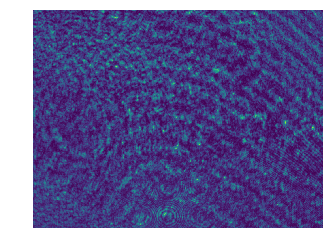

In [16]:
plt.figure()
plt.imshow(image_fondo)
plt.axis('off');

print(image_fondo.max(), image_fondo.min())

### acondicionar camara

In [17]:
slm.camera1.SetPropertySwitch("Gain", "Auto", 0)
slm.camera1.SetPropertySwitch("Exposure", "Auto", 0)

1

In [18]:
slm.camera1.SetPropertyValue("Gain", "Value", 3)
slm.camera1.SetPropertyValue("Exposure", "Value", -6)

1

### Captura del foco

In [19]:
name='calibracion_fondo'

In [20]:
niveles=np.linspace(0,1,25)
intensidades_media=np.zeros_like(niveles,dtype=float)
print(niveles)
print(intensidades_media.shape)

[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]
(25L,)


In [21]:
for i, i_nivel in enumerate(niveles):
    image_fondo=get_fondo(level=i_nivel)
    i_media=intensidad_media(image_fondo, verbose=False)
    intensidades_media[i]=i_media
    print(i, i_media)
    

(0, 22.275798797607422)
(1, 22.292020161946613)
(2, 22.25878651936849)
(3, 22.3412602742513)
(4, 22.23801040649414)
(5, 23.05844497680664)
(6, 24.48475519816081)
(7, 27.86692937215169)
(8, 34.66646067301432)
(9, 43.58854293823242)
(10, 55.817298889160156)
(11, 68.13722483317058)
(12, 80.522216796875)
(13, 94.62837092081706)
(14, 107.83106867472331)
(15, 119.37128321329753)
(16, 129.29065450032553)
(17, 136.3332722981771)
(18, 143.89944330851236)
(19, 148.1591542561849)
(20, 148.58739852905273)
(21, 145.16813532511392)
(22, 137.45414098103842)
(23, 117.02886454264323)
(24, 53.82414118448893)


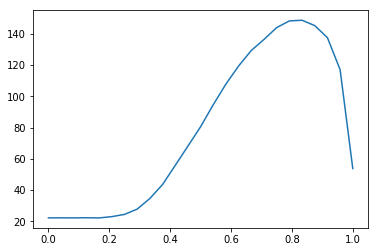

In [22]:
plt.figure()
plt.plot(niveles,intensidades_media)

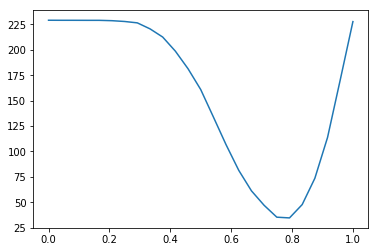

In [33]:
plt.figure()
plt.plot(niveles,intensidades_media)

## Imagen de cuadrados

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0xda20208>)

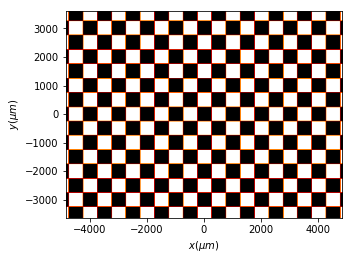

In [23]:
t_2d = Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)
t_2d.grating_2D_ajedrez(period=1*mm, amin=0,   amax=1., phase=0,
                   x0=0, fill_factor=0.5,   angle=0.0 * degrees)
t_2d.draw(kind='intensity')

In [24]:
slm.mask_to_rawImage(mask_XY=t_2d, kind='intensity', normalize=True);
slm.send_image_screen() #"Enviamos la imagen al SLM."
cv2.waitKey(500)

-1

In [36]:
image_fondo=get_fondo(level=0.74)


## Cerrar

In [199]:
smc100.close()

In [200]:
Camera.StopLive()

0